## **Chapter 6: Data Loading, Storage, and File Formats**

**📥 Đọc dữ liệu và làm cho dữ liệu có thể truy cập được (data loading) là bước đầu tiên bắt buộc khi sử dụng hầu hết các công cụ trong cuốn sách này.**

- **Parsing** đôi khi cũng được dùng để mô tả việc nạp dữ liệu văn bản và diễn giải nó thành bảng và các kiểu dữ liệu khác nhau.

Nội dung ở đây tập trung vào **input và output với pandas**, dù thực tế còn rất nhiều thư viện khác hỗ trợ đọc/ghi dữ liệu ở nhiều định dạng khác nhau.

**📂 Các nhóm thao tác input/output phổ biến:**
- **Đọc file văn bản** (text files) và các định dạng lưu trữ hiệu quả hơn trên đĩa.

- **Nạp dữ liệu từ cơ sở dữ liệu** (databases).

- **Tương tác với các nguồn dữ liệu qua mạng** như **web APIs**.

### **6.1 Reading and Writing Data in Text Format**

##### **🗂️ Các hàm đọc dữ liệu văn bản và nhị phân trong pandas**

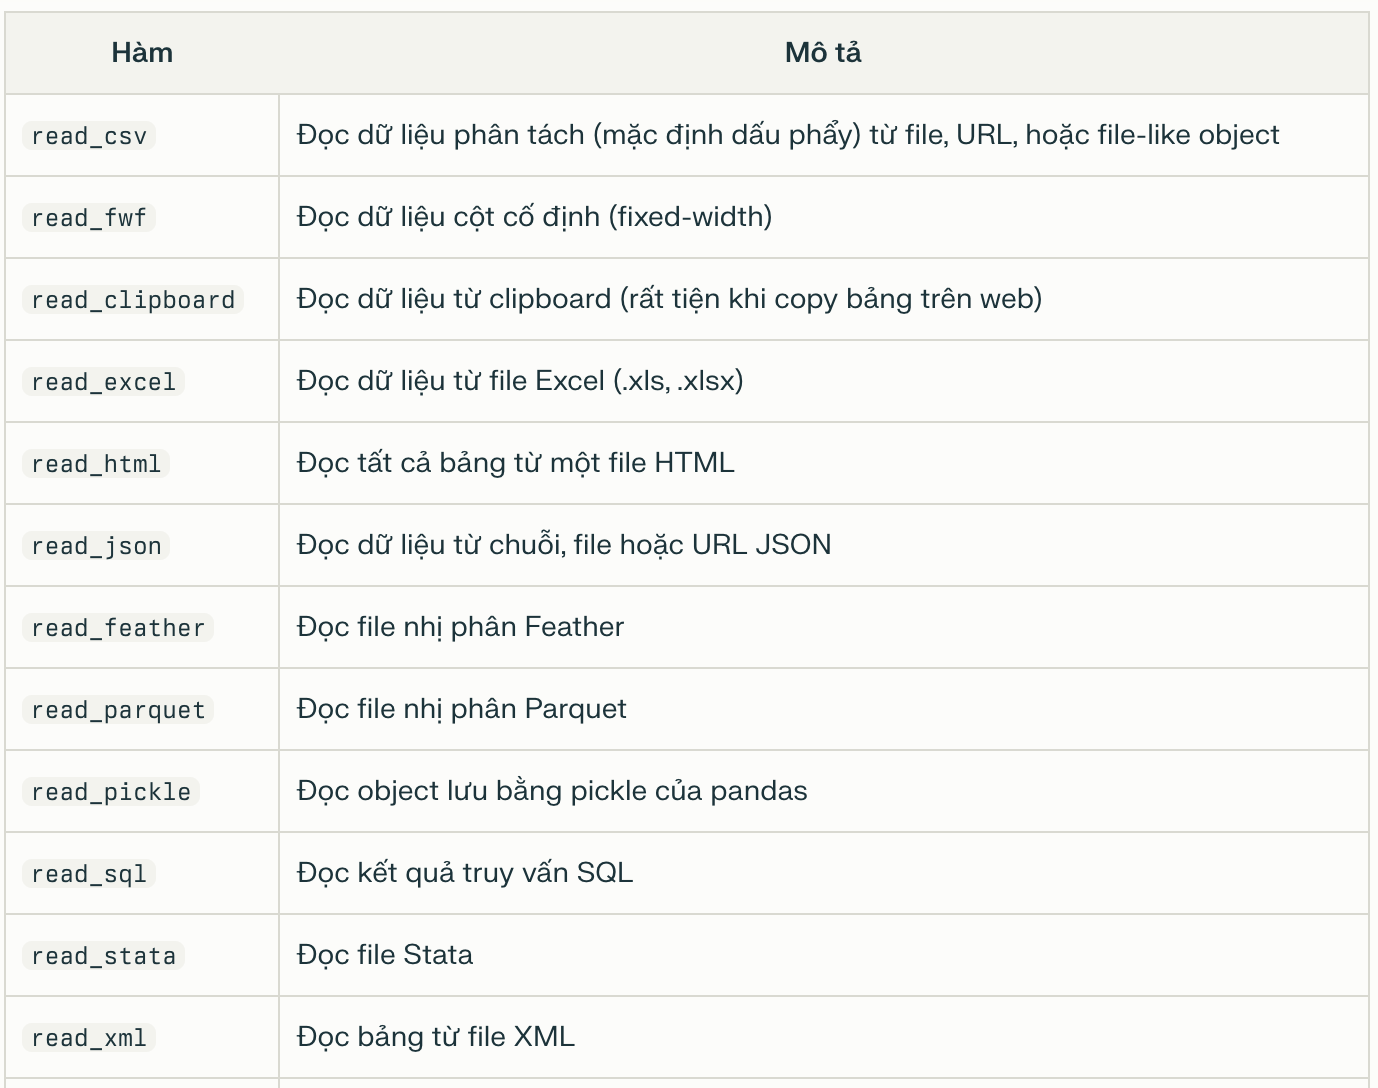

##### **🧩 Cách dùng cơ bản với ví dụ thực tế**

**Đọc file CSV có header:**

In [21]:
import pandas as pd

In [22]:
df = pd.read_csv("examples/ex1.csv")
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


-> pandas tự động nhận dòng đầu là tên cột (header).

**Đọc file không có header:**

In [23]:
pd.read_csv("examples/ex2.csv", header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Hoặc đặt tên cột:

In [24]:
pd.read_csv("examples/ex2.csv", names=["a", "b", "c", "d", "message"])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


**Đặt cột làm index:**

In [25]:
names = ["a", "b", "c", "d", "message"]
pd.read_csv("examples/ex2.csv", names=names, index_col="message")

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


**Đọc file có nhiều cột làm index (MultiIndex):**

In [26]:
pd.read_csv("examples/csv_mindex.csv", index_col=["key1", "key2"])

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

**Đọc file phân tách bằng khoảng trắng:**

In [27]:
result = pd.read_csv("examples/ex3.txt", sep="\s+")
result

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/bg/hsvxykxj7yx0jz1nrhc3k6z40000gn/T/ipykernel_50176/1673285606.py:1: SyntaxWarning: invalid escape sequence '\s'
  result = pd.read_csv("examples/ex3.txt", sep="\s+")


,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


**Bỏ qua dòng đầu, dòng bất kỳ:**

**Ví dụ file có dòng chú thích hoặc dòng thừa:**

In [28]:
pd.read_csv("examples/ex4.csv", skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


- **`skiprows`**: Bỏ qua dòng đầu, dòng bất kỳ (theo số thứ tự dòng).

**Xử lý giá trị thiếu:**

- Mặc định pandas nhận diện **NA, NULL** là NaN.

- Có thể thêm giá trị thiếu riêng:

In [29]:
pd.read_csv("examples/ex5.csv", na_values=["NULL"])

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


**Tắt giá trị thiếu mặc định:**

In [30]:
pd.read_csv("examples/ex5.csv", keep_default_na=False)

,something,a,b,c,d,message
0,one,1,2,3,4,NA
1,two,5,6,,8,world
2,three,9,10,11,12,foo


**Đặt giá trị thiếu riêng cho từng cột:**

In [31]:
sentinels = {"message": ["foo", "NA"], "something": ["two"]}
pd.read_csv("examples/ex5.csv", na_values=sentinels, keep_default_na=False)

,something,a,b,c,d,message
0,one,1,2,3,4,NaN
1,NaN,5,6,,8,world
2,three,9,10,11,12,NaN


##### **Một số tham số quan trọng của pandas.read_csv**

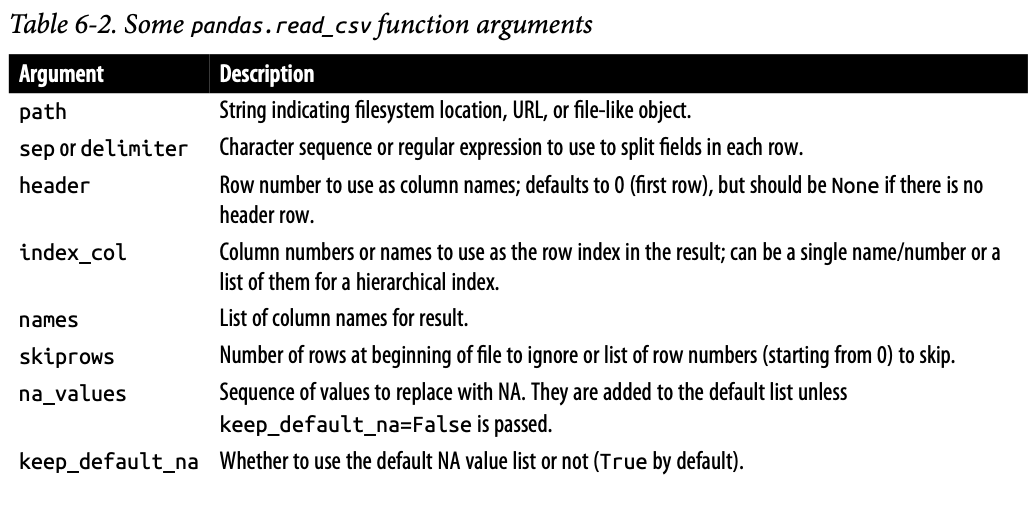
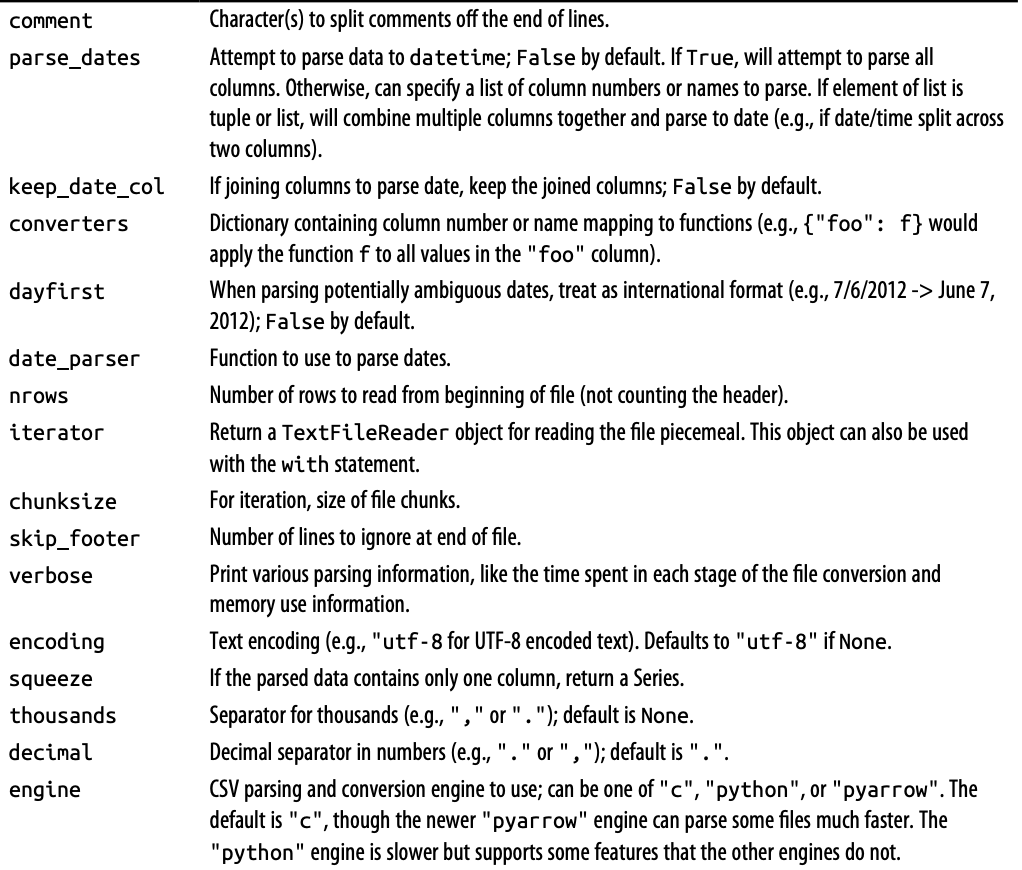

#### **Reading Text Files in Pieces**

##### **🧩 Đọc một phần nhỏ của file lớn**

- Khi làm việc với **file dữ liệu rất lớn**, bạn không cần (và không nên) đọc toàn bộ file vào bộ nhớ.
- pandas cho phép bạn chỉ đọc một **số dòng đầu** với tham số `nrows`:

In [32]:
df_small = pd.read_csv("examples/ex6.csv", nrows=5)
print(df_small)

        one       two     three      four key
0  0.467976 -0.038649 -0.295344 -1.824726   L
1 -0.358893  1.404453  0.704965 -0.200638   B
2 -0.501840  0.659254 -0.421691 -0.057688   G
3  0.204886  1.074134  1.388361 -0.982404   R
4  0.354628 -0.133116  0.283763 -0.837063   Q


-> Chỉ 5 dòng đầu tiên được nạp vào DataFrame.

##### **🗂️ Đọc file thành từng "miếng" (chunk)**

- Dùng tham số `chunksize` để đọc file thành từng khối nhỏ (ví dụ: mỗi lần 1000 dòng).
- Hàm trả về một **TextFileReader** (iterator), cho phép bạn **duyệt từng phần** của file mà không tốn nhiều RAM.

In [33]:
chunker = pd.read_csv("examples/ex6.csv", chunksize=1000)
print(type(chunker))

<class 'pandas.io.parsers.readers.TextFileReader'>


**Duyệt từng chunk:**

In [34]:
for piece in chunker:
    # Xử lý từng phần dữ liệu ở đây
    print(piece.shape)

(1000, 5)
(1000, 5)
(1000, 5)
(1000, 5)
(1000, 5)
(1000, 5)
(1000, 5)
(1000, 5)
(1000, 5)
(1000, 5)


##### **🔍 Ví dụ: Đếm tần suất giá trị trong cột "key" trên file lớn**

In [35]:
tot = pd.Series([], dtype='int64')
chunker = pd.read_csv("examples/ex6.csv", chunksize=1000)

for piece in chunker:
    tot = tot.add(piece["key"].value_counts(), fill_value=0)

tot = tot.sort_values(ascending=False)
print(tot[:10])

key
E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
dtype: float64


-> Hiển thị 10 giá trị xuất hiện nhiều nhất trong cột "key" trên toàn bộ file, mà không cần nạp hết dữ liệu vào bộ nhớ.

##### **⚙️ Đọc linh hoạt với `get_chunk()`**

Đối tượng **TextFileReader** còn có phương thức `get_chunk(n)` để đọc từng phần với kích thước tùy ý:

In [36]:
reader = pd.read_csv("examples/ex6.csv", chunksize=1000)
chunk = reader.get_chunk(500)  # Đọc 500 dòng tiếp theo

**💡 Lưu ý**
- Đọc file theo từng phần giúp tiết kiệm bộ nhớ, phù hợp với file rất lớn hoặc khi bạn chỉ cần xử lý một phần dữ liệu.

- Có thể kết hợp với các thao tác tổng hợp, lọc, hoặc ghi ra file khác theo từng chunk.

#### **Writing Data to Text Format**

##### **📝 Ghi DataFrame ra file CSV**

Sử dụng phương thức `to_csv()` để xuất dữ liệu từ DataFrame ra file dạng phân tách (thường là CSV).

In [38]:
data = pd.read_csv("examples/ex5.csv")
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [39]:
data.to_csv("examples/out.csv")

In [40]:
!cat examples/out.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


##### **🔧 Tùy chỉnh dấu phân tách**

Có thể đổi dấu phân tách bằng tham số `sep`:

In [42]:
import sys
data.to_csv(sys.stdout, sep="|")

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


##### **❓ Tùy chỉnh giá trị thiếu (NaN)**

Mặc định giá trị thiếu là chuỗi rỗng. Có thể thay đổi bằng `na_rep`:

In [43]:
data.to_csv(sys.stdout, na_rep="NULL")

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


##### **🏷️ Tùy chỉnh ghi index và header**

**Ghi không có index và header:**

In [44]:
data.to_csv(sys.stdout, index=False, header=False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


##### **📑 Ghi một phần cột, sắp xếp tùy ý**

Chỉ ghi một số cột nhất định, theo thứ tự mong muốn:

In [45]:
data.to_csv(sys.stdout, index=False, columns=["a", "b", "c"])

a,b,c
1,2,3.0
5,6,
9,10,11.0
